**Machine Learning - 2023.1**

**Autores**: Marco Moliterno e Renato Falcão

# Abstract

Este relatório apresenta um estudo de aplicação de técnicas de aprendizado de máquina para prever o preço de cartas do jogo Yu-Gi-Oh, baseando-se em uma série de características distintas. Para a realização deste trabalho, foi utilizado um dataset consolidado a partir da junção de dados obtidos na plataforma Kaggle e da API do website Yu-Gi-Oh Prices, fornecendo um amplo escopo de informações sobre as cartas, bem como seus preços médios. Este estudo visa explorar o potencial do aprendizado de máquina na interpretação e modelagem de padrões de preço no mercado de cartas colecionáveis, oferecendo insights valiosos para colecionadores e negociantes de cartas Yu-Gi-Oh. Os resultados obtidos neste estudo podem servir como base para futuras pesquisas e aplicações práticas, aprimorando a compreensão e previsão do mercado de cartas colecionáveis.

# Importando bibliotecas e carregando base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("dbs/yugi_db_polished.csv", index_col=0)

df.head()

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
0,XX-Saber Boggart Knight,Shatterfoil Rare,2.73,When this card is Normal Summoned: You can Spe...,monster,earth,1900.0,1000.0,4.0,NaN,Beast-Warrior,Effect,NaN,NaN,NaN,NaN,NaN
1,Gagaga Cowboy,Shatterfoil Rare,4.68,2 Level 4 monsters\r\n\r\nOnce per turn: You c...,monster,earth,1500.0,2400.0,4.0,NaN,Warrior,Effect,NaN,Xyz,NaN,NaN,NaN
2,Forbidden Chalice,Shatterfoil Rare,2.09,Target 1 face-up monster on the field; until t...,spell,NaN,NaN,NaN,NaN,Quick-Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fairy Cheer Girl,Shatterfoil Rare,2.06,2 Level 4 Fairy-Type monsters\r\n\r\nYou can d...,monster,light,1900.0,1500.0,4.0,NaN,Fairy,Effect,NaN,Xyz,NaN,NaN,NaN
4,Exploder Dragon,Shatterfoil Rare,2.08,If this card is destroyed by battle and sent t...,monster,earth,1000.0,0.0,3.0,NaN,Dragon,Effect,NaN,NaN,NaN,NaN,NaN


# Análise Exploratória e Limpeza dos Dados

A partir desta base de dados, é possível começar o estudo realizando uma *análise exploratória*, na qual se deseja identificar as características do dataset, observando a estrutura dos dados disponíveis, presença de anomalias, tendências, padrões, distribuições e dados ausentes. O entendimento dos dados é fundamental para se poder tomar decisões com bom embasamento acerca da forma como o probelam será abordado.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11574 entries, 0 to 11573
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         11574 non-null  object 
 1   Rarity       11574 non-null  object 
 2   Price        11574 non-null  float64
 3   Description  11574 non-null  object 
 4   CardType     11574 non-null  object 
 5   Attribute    7470 non-null   object 
 6   ATK          7580 non-null   float64
 7   DEF          7580 non-null   float64
 8   LVL          7580 non-null   float64
 9   Property     4096 non-null   object 
 10  MonsterType  7478 non-null   object 
 11  isEffect     7478 non-null   object 
 12  Duelist      102 non-null    object 
 13  Ability1     1696 non-null   object 
 14  Ability2     137 non-null    object 
 15  isTuner      453 non-null    object 
 16  isPendulum   277 non-null    object 
dtypes: float64(4), object(13)
memory usage: 1.6+ MB


In [3]:
df.columns

Index(['Name', 'Rarity', 'Price', 'Description', 'CardType', 'Attribute',
       'ATK', 'DEF', 'LVL', 'Property', 'MonsterType', 'isEffect', 'Duelist',
       'Ability1', 'Ability2', 'isTuner', 'isPendulum'],
      dtype='object')

As variáveis que estão disponíveis na base de dados são as seguintes:

**Name**: O nome da carta. Cada carta de Yu-Gi-Oh tem um nome único que a distingue de outras cartas.

**Rarity**: Refere-se à raridade da carta. No geral, as cartas raras são mais difíceis de encontrar do que as comuns. Exemplos de raridades incluem "Common", "Rare", "Ultra Rare", "Secret Rare", entre outros.

**Price**: O preço de mercado da carta. Isso pode variar com base em vários fatores, como raridade, demanda, condição da carta e se ela está em circulação.

**Description**: O texto da carta, que descreve o seu efeito ou lore.

**CardType**: O tipo de carta. As cartas de Yu-Gi-Oh podem ser de vários tipos, como Monstros, Magias, ou Armadilhas.

**Attribute**: Uma caracteristica específica dos monstros. Existem 6 atributos principais: Luz, Trevas, Fogo, Água, Terra e Vento.

**ATK**: Abreviação de "Attack Points". Este é o poder de ataque de uma carta de monstro. Quando dois monstros em modo de ataque batalham, o monstro com o ATK mais alto geralmente destrói o monstro com o ATK mais baixo.

**DEF**: Abreviação de "Defense Points". Este é o poder de defesa de uma carta de monstro. É usado quando o monstro está em posição de defesa.

**LVL**: Abreviação de "Level". Este é o nível de uma carta de monstro. O nível de um monstro geralmente determina seu poder, e também é usado para o mecanismo de invocação de tributo. Um monstro level 4 ou menor pode ser invocado normalmente sem tributo, um monstro nível 5 ou 6 necessita um, e um monstro nível 7 ou maior necessíta dois.

**Property**: Este é um atributo de cartas de Magia e Armadilha. As propriedades de cartas de Magia incluem "Normal", "Contínua", "Equipamento", "Campo", "Rápida", etc. As cartas de Armadilha têm propriedades "Normal", "Contínua" e "Contra".

**MonsterType**: Isto é específico para cartas de monstros e refere-se à sua classificação. Exemplos incluem "Guerreiro", "Besta", "Dragão", "Demoníaco", etc.

**isEffect**: Um indicador de se o monstro é uma carta de Monstro de Efeito. Estes monstros têm habilidades especiais que são ativadas sob certas condições.

**Duelist**: Uma característica específica a cartas Skill. Indica o duelista que utiliza a carta. 

**Ability1** e **Ability2**: Estes se referem a habilidades especiais ou efeitos que a carta pode ter. Algumas cartas podem ter várias habilidades. Exemplos incluem 'Spirit', 'Gemini' e 'Toon'.

**isTuner**: Um indicador de se a carta é um Monstro Tuner. Estes monstros são usados para Invocações Synchro.

**isPendulum**: Um indicador de se a carta é um Monstro de Pêndulo. Estes monstros podem ser usados como mágias quando jogados nas Zonas de Pêndulo. Além disso, eles têm escalas de Pêndulo que permitem seu uso em Invocação por Pêndulo.

É possível notar que diversas colunas possuem uma grande quantidade de dados faltantes. No entanto, esses dados "faltantes" significam, na verdade, se as cartas possuem certos atributos ou não. Para analisar as características individuais de cada tipo de carta ("CardType"), podemos analisar um recorte de cada um dos tipos:

In [4]:
text_card_features = ["Name", "Description"]
categoric_card_features = ["CardType", "Rarity", "Attribute", "Property", "MonsterType", "Duelist", "Ability1", "Ability2"]
boolean_card_features = ["isEffect", "isTuner", "isPendulum"]
numeric_card_features = ["ATK", "DEF", "LVL", "Price"]

card_types = df["CardType"].unique()

bold = lambda word: f"\033[1m{word}\033[0m"
color = lambda word: f"\033[92m{word}\033[0m"

for card_type in card_types:
    print(f"{color('Card Type')}: \n{card_type}\n")
    slice = df[df["CardType"] == card_type]
    for feature in categoric_card_features[1:]:
        print(f"{bold(feature)}: \n{slice[feature].unique()}\n")
    for feature in boolean_card_features:
        print(f"{bold(feature)}: \n{slice[feature].unique()}\n")
    for feature in numeric_card_features:
        print(f"{bold(feature)}: \n{slice[feature].describe()}\n")
    print("------------------------------------------------------------------------------------------------------------------------\n")

Card Type: 
monster

Rarity: 
['Shatterfoil Rare' 'Mosaic Rare' 'Common' 'Platinum Secret Rare'
 'Platinum Rare' 'Short Print' 'Starfoil Rare' 'Gold Secret Rare' 'Rare'
 'Premium Gold Rare' 'Gold Rare' "Collector's Rare" 'Collectors Rare'
 'Duel Terminal Ultra Parallel Rare' 'Prismatic Secret Rare'
 'Duel Terminal Normal Parallel Rare' 'Super Rare'
 'Duel Terminal Super Parallel Rare' 'Ultimate Rare' 'Secret Rare'
 'Ultra Rare' '10000 Secret Rare']

Attribute: 
['earth' 'light' 'water' 'dark' 'wind' 'divine' 'fire' nan '?']

Property: 
[nan]

MonsterType: 
['Beast-Warrior' 'Warrior' 'Fairy' 'Dragon' 'Aqua' 'Zombie' 'Rock' 'Beast'
 'Insect' 'Sea Serpent' 'Fiend' 'Reptile' 'Plant' 'Thunder' 'Spellcaster'
 'Machine' 'Winged Beast' 'Divine-Beast' 'Dinosaur' 'Pyro' 'Fish' 'Normal'
 'Psychic' 'Cyberse' 'Wyrm' 'Token']

Duelist: 
[nan]

Ability1: 
[nan 'Xyz' 'Fusion' 'Synchro' 'Ritual' 'Toon' 'Link' 'Union' 'Gemini']

Ability2: 
[nan 'Flip' 'Spirit']

isEffect: 
['Effect' 'Normal']

isTuner: 

Desta forma, é possível inferir a seguinte relação dos tipos de cartas para as características que podem possuir:

- **Monster**: Possui *Attribute*, *ATK*, *DEF*, *LVL*, *MonsterType*, *isEffect*, *Ability1*, *Ability2*, *isTuner* e *isPendulum*;
- **Spell**: Possui apenas *Property*;
- **Trap**: Possui apenas *Property*;
- **Skill**: Possui *Property* e *Duelist*;

Além disso, as características *Name*, *Description*, *Rarity* e *Price* são comuns à todas as cartas.

## Analisando cartas do tipo *Monster*

É possível observar que existem cartas do tipo *Monster* cuja variável *Attribute* é "NaN" e "?", ou seja, são valores nulos. Observando estes dados anômalos, obtêm-se o seguinte:

In [5]:
outliers_nan = df[(df["CardType"] == "monster") & (df["Attribute"].isna() == True)]
outliers_nan

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
209,Token,Common,4.23,This card can be used as any Token.,monster,NaN,0.0,0.0,0.0,NaN,Normal,Normal,NaN,NaN,NaN,NaN,NaN
4195,Ecclesia the Exiled,Common,1.21,This card can be used as any Token or Counter....,monster,NaN,0.0,0.0,0.0,NaN,Token,Normal,NaN,NaN,NaN,NaN,NaN
4206,Albaz the Shrouded,Common,1.21,This card can be used as any Token or Counter....,monster,NaN,0.0,0.0,0.0,NaN,Token,Normal,NaN,NaN,NaN,NaN,NaN
4209,Aluber the Dogmatic,Common,1.25,This card can be used as any Token or Counter....,monster,NaN,0.0,0.0,0.0,NaN,Token,Normal,NaN,NaN,NaN,NaN,NaN
4229,The Virtuous Vestals,Common,1.21,This card can be used as any Token or Counter....,monster,NaN,0.0,0.0,0.0,NaN,Token,Normal,NaN,NaN,NaN,NaN,NaN
4233,Tri-Brigade,Common,1.22,This card can be used as any Token or Counter....,monster,NaN,0.0,0.0,0.0,NaN,Token,Normal,NaN,NaN,NaN,NaN,NaN
9369,Jesse Anderson - Bonder with the Crystal Beasts,Super Rare,1.25,This card can be used as any Token or Counter....,monster,NaN,0.0,0.0,0.0,NaN,Normal,Normal,NaN,NaN,NaN,NaN,NaN
9370,Jesse and Ruby - Unleashing the Legend,Super Rare,1.25,This card can be used as any Token or Counter....,monster,NaN,0.0,0.0,0.0,NaN,Normal,Normal,NaN,NaN,NaN,NaN,NaN


In [6]:
outliers_questionmark = df[(df["CardType"] == "monster") & (df["Attribute"] == "?")]
outliers_questionmark

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
7801,Crystal Beast Token,Common,1.18,"This card can be used as a ""Crystal Beast Toke...",monster,?,0.0,0.0,0.0,NaN,Normal,Normal,NaN,NaN,NaN,NaN,NaN
10216,Duel Dragon Token,Super Rare,1.84,"This card can be used as a ""Duel Dragon Token""...",monster,?,0.0,0.0,0.0,NaN,Normal,Normal,NaN,NaN,NaN,NaN,NaN
10464,Option Token,Super Rare,1.48,"This card can be used as an ""Option Token"".\r\...",monster,?,0.0,0.0,0.0,NaN,Normal,Normal,NaN,NaN,NaN,NaN,NaN


Essas cartas na verdade são **Tokens** do jogo, que são apenas representações de **Monstros** que não entram em decks. Desta forma, não vamos considerá-las para a análise.

In [7]:
df.drop(outliers_nan.index, inplace=True)
df.drop(outliers_questionmark.index, inplace=True)
df.reset_index(drop=True, inplace=True)

## Analisando características com valores booleanos

Outro detalhe que chama a atenção são as colunas *isEffect*, *isTuner* e *isPendulum*. Essas colunas indicam um propriedade específica das cartas e podem ser transformadas em variáveis booleanas: *0* para *Falso* e *1* para *Verdadeiro*.

In [8]:
df["isEffect"].replace([np.nan, "Normal"], 0, inplace=True)
df["isEffect"].replace("Effect", 1, inplace=True)

df["isTuner"].replace(np.nan, 0, inplace=True)
df["isTuner"].replace("Tuner", 1, inplace=True)

df["isPendulum"].replace(np.nan, 0, inplace=True)
df["isPendulum"].replace("Pendulum", 1, inplace=True)

## Substituição de valores inválidos

Ainda, é possível notar que existem muitos valores "NaN", que é uma forma de identificar valores *nulos*. No entanto, os valores nulos são, neste caso, informações úteis também, já que indicam quando as cartas não possuem certos atributos. Desta forma, estes valores serão substituídos por categorias ou valores numéricos que, por sua vez, representem a não existência de informação.

In [9]:
for feature in categoric_card_features:
    df[feature].replace(np.nan, "None", inplace=True)

for feature in numeric_card_features:
    df[feature].replace(np.nan, 0, inplace=True)

## Dados anômalos para o valor do preço

Além do mais, percebe-se que os preços das cartas possuem uma variação muito grande. Analisando o `describe` e a distribuição dos preços, obtém-se o seguinte:

Card Type: 
monster

Price: 
count    7467.000000
mean        4.932986
std        62.913428
min         0.250000
25%         1.300000
50%         1.600000
75%         2.070000
max      3910.990000
Name: Price, dtype: float64

-------------------------------------------------

Card Type: 
spell

Price: 
count    2258.000000
mean        2.673968
std        11.022484
min         0.300000
25%         1.300000
50%         1.550000
75%         1.960000
max       444.990000
Name: Price, dtype: float64

-------------------------------------------------

Card Type: 
trap

Price: 
count    1736.000000
mean        1.909084
std         3.318303
min         0.330000
25%         1.280000
50%         1.390000
75%         1.872500
max       109.210000
Name: Price, dtype: float64

-------------------------------------------------

Card Type: 
skill

Price: 
count    102.000000
mean       1.746373
std        0.977717
min        1.140000
25%        1.242500
50%        1.350000
75%        1.732500
max    

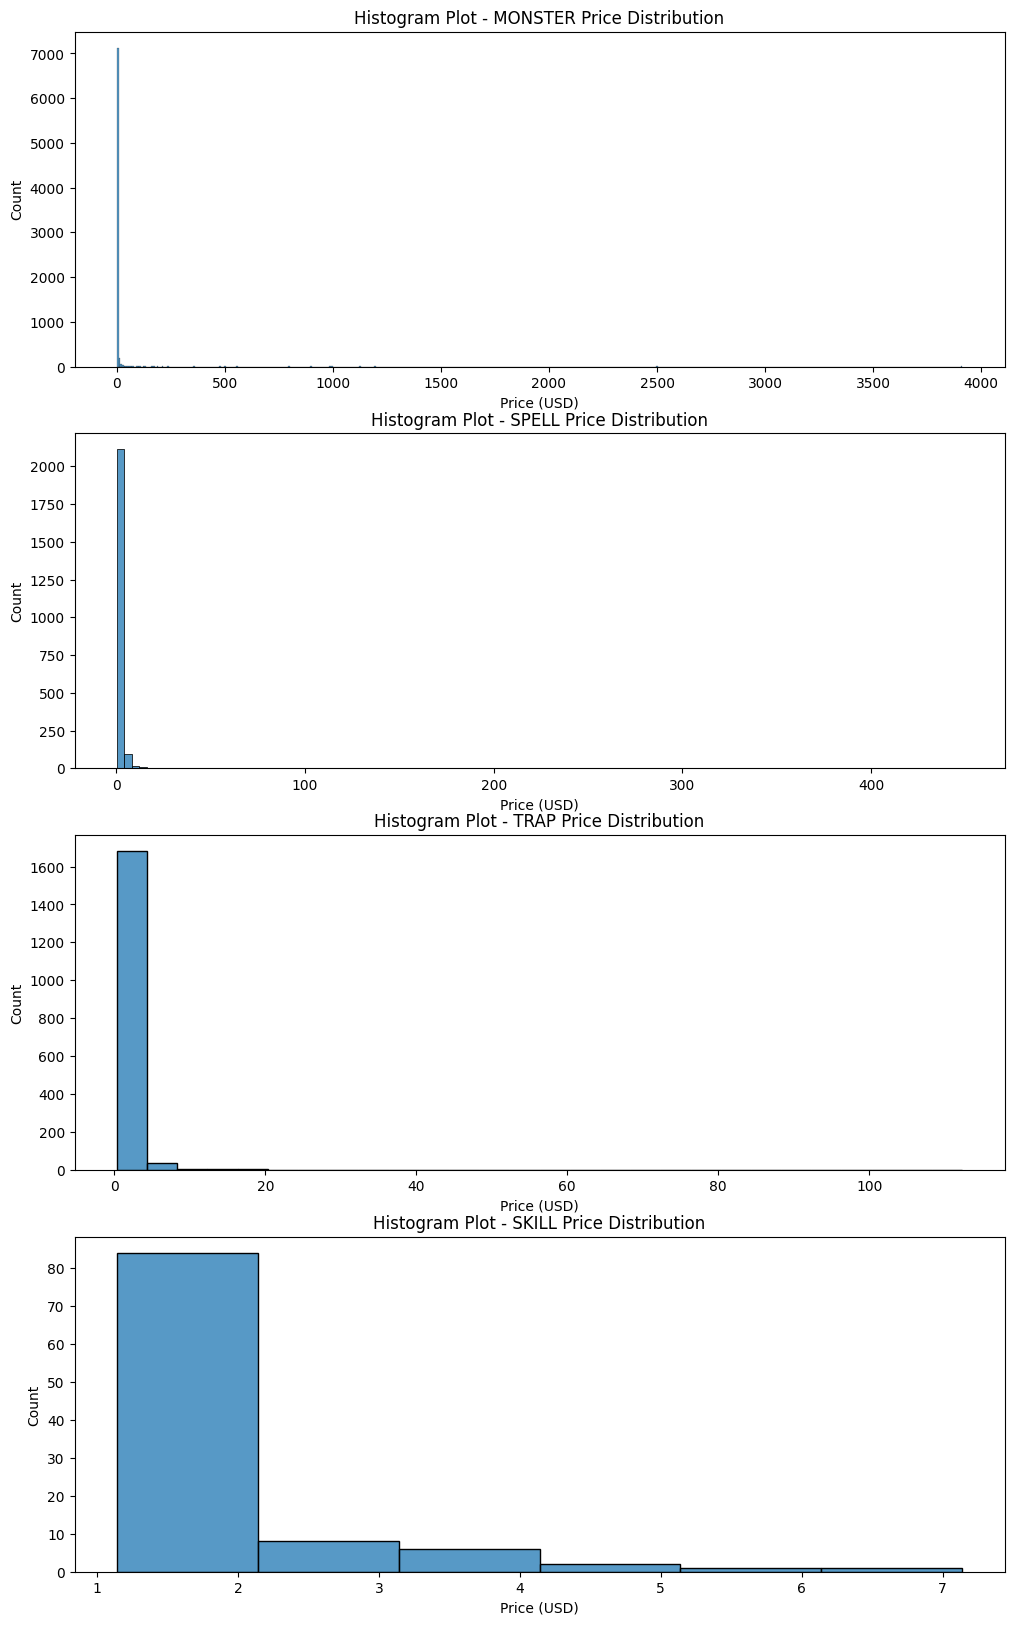

In [10]:
subplot_idx = 411
plt.figure(figsize=(12, 20))

for card_type in card_types:
    print(f"{color('Card Type')}: \n{card_type}\n")
    slice = df[df["CardType"] == card_type]
    print(f"{bold('Price')}: \n{slice['Price'].describe()}\n")

    plt.subplot(subplot_idx)
    sns.histplot(data=slice, x="Price", binwidth=np.sqrt(slice.shape[0]) // 10)
    plt.xlabel("Price (USD)")
    plt.ylabel("Count")
    plt.title(f"Histogram Plot - {card_type.upper()} Price Distribution")
    subplot_idx += 1
    
    print("-------------------------------------------------\n")

plt.show()

A partir da observação das distribuições acima, surge a decisão de remover os valores de preço que distoem muito. Esta decisão será tomada com base na informação visual disponível, com o objetivo de manter a maior quantidade de valores possível sem comprometer significativamente a faixa de valores que serão compreendidas pelo modelo.

In [11]:
outliers_monster_card_price = df[(df["CardType"] == "monster") & (df["Price"] > 100)]
outliers_monster_card_price

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
134,Petit Angel,Common,499.99,A quick-moving and tiny fairy that's very diff...,monster,light,600.0,900.0,3.0,None,Fairy,0,None,None,None,0,0
1614,Wings of Wicked Flame,Short Print,472.40,Crimson wings of fire make this a very lethal ...,monster,fire,700.0,600.0,2.0,None,Pyro,0,None,None,None,0,0
1654,Key Mace 2,Rare,164.02,This fiend brings out the worst in everyone.,monster,dark,1050.0,1200.0,4.0,None,Fiend,0,None,None,None,0,0
1657,Obese Marmot of Nefariousness,Rare,354.46,An ill-mannered field varmint that will sink i...,monster,earth,750.0,800.0,3.0,None,Beast,0,None,None,None,0,0
1739,Skull Guardian,Rare,130.92,This monster can only be Ritual Summoned with ...,monster,light,2050.0,2500.0,7.0,None,Warrior,0,None,None,None,0,0
1740,Warrior of Tradition,Rare,100.45,"""Sonic Maid"" + ""Beautiful Headhuntress""",monster,earth,1900.0,1700.0,6.0,None,Warrior,0,None,None,None,0,0
1742,Beautiful Headhuntress,Rare,105.08,A vicious creature that has decapitated numero...,monster,earth,1600.0,800.0,4.0,None,Warrior,0,None,None,None,0,0
1850,Garma Sword,Super Rare,553.54,This card can only be Ritual Summoned with the...,monster,dark,2550.0,2150.0,7.0,None,Warrior,0,None,None,None,0,0
1857,"Duel Link Dragon, the Duel Dragon",Super Rare,999.99,"2+ monsters, including a Synchro Monster\r\n\r...",monster,dark,0.0,0.0,0.0,None,Dragon,1,None,Link,None,0,0
1858,"Chaos Emperor, the Dragon of Armageddon",Super Rare,899.99,"Pendulum Effect: You can pay 1000 LP, then tar...",monster,dark,3000.0,2500.0,8.0,None,Dragon,1,None,None,None,0,1


In [12]:
outliers_spell_card_price = df[(df["CardType"] == "spell") & (df["Price"] > 50)]
outliers_spell_card_price

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
1476,Get Your Game On!,Common,444.99,You can only play this card if you were presen...,spell,None,0.0,0.0,0.0,Continuous,None,0,None,None,None,0,0
1656,Mooyan Curry,Rare,57.61,Choose 1 player; that player gains 200 Life Po...,spell,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0
1728,Elf's Light,Rare,88.68,A LIGHT monster equipped with this card increa...,spell,None,0.0,0.0,0.0,Equip,None,0,None,None,None,0,0
1736,Novox's Prayer,Rare,69.40,"This card is used to Ritual Summon ""Skull Guar...",spell,None,0.0,0.0,0.0,Ritual,None,0,None,None,None,0,0
1867,Breath of Light,Super Rare,109.99,Destroy all face-up Rock-Type monsters on the ...,spell,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0
1871,Dimension Fusion,Super Rare,70.44,Pay 2000 Life Points. Both players Special Sum...,spell,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0
1997,Triple Tactics Talent,Secret Rare,63.55,If your opponent has activated a monster effec...,spell,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0
2075,Yu-Jo Friendship,Ultra Rare,136.95,Offer your opponent a handshake. If they accep...,spell,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0


In [13]:
outliers_trap_card_price = df[(df["CardType"] == "trap") & (df["Price"] > 20)]
outliers_trap_card_price

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
1851,Anti Raigeki,Super Rare,109.21,"When your opponent activates ""Raigeki"": Negate...",trap,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0
1913,Mystical Refpanel,Secret Rare,44.84,Activate only when a Spell Card that targets 1...,trap,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0
1941,Evenly Matched,Secret Rare,38.25,"At the end of the Battle Phase, if your oppone...",trap,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0
2072,Judgment of the Pharaoh,Ultra Rare,41.50,Pay half of your Life Points. Select and activ...,trap,None,0.0,0.0,0.0,Normal,None,0,None,None,None,0,0


In [14]:
outliers_skill_card_price = df[(df["CardType"] == "skill") & (df["Price"] > 6)]
outliers_skill_card_price

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
126,Spell Proof Armor,Common,6.52,Activate this Skill during your Main Phase and...,skill,None,0.0,0.0,0.0,Skill,None,0,Keith,None,None,0,0


In [15]:
df.drop(outliers_monster_card_price.index, inplace=True)
df.drop(outliers_spell_card_price.index, inplace=True)
df.drop(outliers_trap_card_price.index, inplace=True)
df.drop(outliers_skill_card_price.index, inplace=True)
df.reset_index(drop=True, inplace=True)

Com a decisão acima, o modelo está restringido às seguintes limitações:

O modelo não será capaz de prever com boa acurácia o preço de cartas do tipo:

- *Monster*, cujo valor estimado exceda $100$ dólares;

- *Spell*, cujo valor estimado exceda $50$ dólares;

- *Trap*, cujo valor estimado exceda $20$ dólares;

- *Skill*, cujo valor estimado exceda $6$ dólares.

## Definição dos tipos das variáveis

Por fim, os tipos das variáveis devem ser definidos, identificando-as como *texto*, *categóricas* ou *numéricas* (sejam discretas ou contínuas).

In [16]:
for feature in text_card_features:
    df[feature] = df[feature].astype("string")

for feature in boolean_card_features:
    df[feature] = df[feature].astype("int64")

for feature in categoric_card_features:
    df[feature] = df[feature].astype("category")

for feature in numeric_card_features:
    df[feature] = df[feature].astype("float64")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11526 entries, 0 to 11525
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         11526 non-null  string  
 1   Rarity       11526 non-null  category
 2   Price        11526 non-null  float64 
 3   Description  11526 non-null  string  
 4   CardType     11526 non-null  category
 5   Attribute    11526 non-null  category
 6   ATK          11526 non-null  float64 
 7   DEF          11526 non-null  float64 
 8   LVL          11526 non-null  float64 
 9   Property     11526 non-null  category
 10  MonsterType  11526 non-null  category
 11  isEffect     11526 non-null  int64   
 12  Duelist      11526 non-null  category
 13  Ability1     11526 non-null  category
 14  Ability2     11526 non-null  category
 15  isTuner      11526 non-null  int64   
 16  isPendulum   11526 non-null  int64   
dtypes: category(8), float64(4), int64(3), string(2)
memory usage: 904.8 K

## Salvando Dataset Limpo

In [18]:
df.to_csv("dbs/yugi_db_cleaned.csv")

# Pré-processamento dos dados

Agora que o dataset está limpo, a ideia é realizar um pré-processamento desses dados. Nesta etapa, os dados são transformados em uma forma adequada para serem utilizados pelos modelos de Machine Learning. Isso pode envolver a normalização ou padronização das variáveis, a codificação de variáveis categóricas, a redução de dimensionalidade, entre outras técnicas de preparação dos dados.

In [19]:
df = pd.read_csv("dbs/yugi_db_cleaned.csv", index_col=0)

df.head()

,Name,Rarity,Price,Description,CardType,Attribute,ATK,DEF,LVL,Property,MonsterType,isEffect,Duelist,Ability1,Ability2,isTuner,isPendulum
0,XX-Saber Boggart Knight,Shatterfoil Rare,2.73,When this card is Normal Summoned: You can Spe...,monster,earth,1900.0,1000.0,4.0,None,Beast-Warrior,1,None,None,None,0,0
1,Gagaga Cowboy,Shatterfoil Rare,4.68,2 Level 4 monsters\r\n\r\nOnce per turn: You c...,monster,earth,1500.0,2400.0,4.0,None,Warrior,1,None,Xyz,None,0,0
2,Forbidden Chalice,Shatterfoil Rare,2.09,Target 1 face-up monster on the field; until t...,spell,None,0.0,0.0,0.0,Quick-Play,None,0,None,None,None,0,0
3,Fairy Cheer Girl,Shatterfoil Rare,2.06,2 Level 4 Fairy-Type monsters\r\n\r\nYou can d...,monster,light,1900.0,1500.0,4.0,None,Fairy,1,None,Xyz,None,0,0
4,Exploder Dragon,Shatterfoil Rare,2.08,If this card is destroyed by battle and sent t...,monster,earth,1000.0,0.0,3.0,None,Dragon,1,None,None,None,0,0


In [20]:
model_data = df.copy()

## Tratando variáveis categóricas

Variáveis categóricas são aquelas que possuem categorias ou classes, representadas como texto ou dados não numéricos. No entanto, os modelos de *machine learning* aceitam apenas valores numéricos. Para solucionar este problema e permitir que esses algoritmos processem variáveis categóricas, é possível transformá-las em variáveis "dummy".

A criação de variáveis "dummy" envolve a codificação de cada categoria única da variável categórica original em novas variáveis binárias. Cada uma dessas novas variáveis binárias assume o valor de 1 se a amostra pertencer à categoria que ela representa e 0 caso contrário.

No entretanto, estes dados codificados vão apresentar um fenômeno chamado de *dependência linear*, também chamada de *multicolinearidade*, em que duas ou mais variáveis independentes são altamente correlacionadas. Se a multicolinearidade for forte, pode ser difícil determinar o efeito individual de cada variável independente na variável dependente, porque é difícil dizer onde o efeito de uma variável acaba e o efeito de outra começa. Isso pode tornar os coeficientes do modelo instáveis e difíceis de interpretar.

Assim, a primeira variável "dummy" gerada de cada categoria única da variável categórica original será descartada com o objetivo de eliminar a dependência linear.

In [21]:
model_data = pd.get_dummies(model_data, columns=categoric_card_features, drop_first=True)
model_data.head()

,Name,Price,Description,ATK,DEF,LVL,isEffect,isTuner,isPendulum,CardType_skill,...,Ability1_Gemini,Ability1_Link,Ability1_None,Ability1_Ritual,Ability1_Synchro,Ability1_Toon,Ability1_Union,Ability1_Xyz,Ability2_None,Ability2_Spirit
0,XX-Saber Boggart Knight,2.73,When this card is Normal Summoned: You can Spe...,1900.0,1000.0,4.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,Gagaga Cowboy,4.68,2 Level 4 monsters\r\n\r\nOnce per turn: You c...,1500.0,2400.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,Forbidden Chalice,2.09,Target 1 face-up monster on the field; until t...,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,Fairy Cheer Girl,2.06,2 Level 4 Fairy-Type monsters\r\n\r\nYou can d...,1900.0,1500.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,Exploder Dragon,2.08,If this card is destroyed by battle and sent t...,1000.0,0.0,3.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Text Embedding da variável "Description"

A informação da descrição ("Description") das cartas, apesar de ser um texto complexo e não apenas uma variável categórica ou numérica, ainda pode ser transformado em informação útil para o modelo. A solução é utilizar um modelo pré-treinado do Keras para obter um vetor numérico a partir das palavras da descrição. Este processo é chamado de *embedding*. Com este vetor, é possível realizar uma decomposição conhecida com *Principal Component Analysis* (ou *PCA*), reduzindo esse vetor à apenas 10 valores, que serão passados como variáveis para o modelo de regressão.

In [22]:
import tensorflow_hub as hub
import tensorflow as tf
from sklearn.decomposition import PCA

text_emb_model = hub.KerasLayer("http://tfhub.dev/google/nnlm-en-dim128/2", input_shape=[], dtype=tf.string)

In [23]:
cards_description = model_data["Description"].values

In [24]:
text_embeddings = text_emb_model(cards_description)
text_embeddings.shape

TensorShape([11526, 128])

In [25]:
pca_model = PCA(n_components=10)
pca_embeddings = pca_model.fit_transform(text_embeddings)
pca_embeddings.shape

(11526, 10)

In [26]:
pca_data = pd.DataFrame(pca_embeddings, columns=[f"PCA_{i}" for i in range(10)])
pca_data.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,0.189476,0.247713,0.177363,0.404395,-0.124737,-0.264215,-0.022490,0.025593,-0.077695,0.192165
1,0.196088,-0.034920,-0.387183,0.149245,0.254067,-0.141085,-0.006232,-0.044926,-0.027360,-0.321693
2,0.587523,-0.313823,-0.028853,0.188721,0.206527,-0.112193,-0.373780,-0.072298,-0.121775,-0.105937
3,0.241158,0.365377,-0.042572,0.028092,0.274055,-0.227318,-0.095831,0.363996,0.317362,-0.147862
4,0.337278,-0.863000,0.093215,-0.372143,0.015444,-0.275757,0.389398,-0.003975,-0.037042,0.047763


In [27]:
model_data = model_data.join(pca_data)
model_data.drop(columns=["Name", "Description"], inplace=True)
model_data.head()

,Price,ATK,DEF,LVL,isEffect,isTuner,isPendulum,CardType_skill,CardType_spell,CardType_trap,...,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,2.73,1900.0,1000.0,4.0,1,0,0,0,0,0,...,0.189476,0.247713,0.177363,0.404395,-0.124737,-0.264215,-0.022490,0.025593,-0.077695,0.192165
1,4.68,1500.0,2400.0,4.0,1,0,0,0,0,0,...,0.196088,-0.034920,-0.387183,0.149245,0.254067,-0.141085,-0.006232,-0.044926,-0.027360,-0.321693
2,2.09,0.0,0.0,0.0,0,0,0,0,1,0,...,0.587523,-0.313823,-0.028853,0.188721,0.206527,-0.112193,-0.373780,-0.072298,-0.121775,-0.105937
3,2.06,1900.0,1500.0,4.0,1,0,0,0,0,0,...,0.241158,0.365377,-0.042572,0.028092,0.274055,-0.227318,-0.095831,0.363996,0.317362,-0.147862
4,2.08,1000.0,0.0,3.0,1,0,0,0,0,0,...,0.337278,-0.863000,0.093215,-0.372143,0.015444,-0.275757,0.389398,-0.003975,-0.037042,0.047763


## Correlação entre variáveis

Por fim, é importante também analisar as dependências lineares entre as variáveis, com o objetivo de identificar se será ou não necessário o uso de uma regularização.

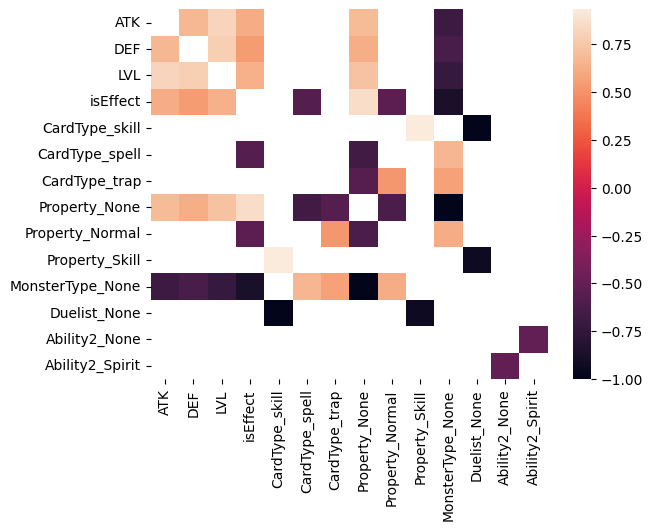

In [28]:
corr = model_data.corr(numeric_only=True)
corr = corr[(abs(corr) > 0.5) & (abs(corr) != 1)]
corr.dropna(axis=0, how='all', inplace=True)
corr.dropna(axis=1, how='all', inplace=True)
sns.heatmap(corr);

É possível notar que sim, existem diversas variáveis em que há presença de colinearidade. Essa informação será muito útil para a escolha das técnicas que serão utilizadas.

# Divisão dos dados

Antes de prosseguir para a seleção de um modelo e treinamento, é necessário dividir os dados em conjuntos de treinamento, validação e teste. O conjunto de treinamento é utilizado para treinar o modelo, o conjunto de validação é usado para ajustar os parâmetros do modelo e o conjunto de teste é utilizado para avaliar o desempenho final do modelo. Esta divisão é importante para evitar que a avaliação do modelo seja enviesada pelo resultado final, de forma a causar um "sobreajuste" para os dados de teste. 

In [29]:
X = model_data.drop(columns=["Price"]).values
y = model_data["Price"].values

In [30]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.25
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
)

In [31]:
print(f"X: {X.shape} \nx_train: {X_train.shape} \nx_valid: {X_valid.shape} \nx_test: {X_test.shape}")

X: (11526, 129) 
x_train: (6483, 129) 
x_valid: (2161, 129) 
x_test: (2882, 129)


In [32]:
print(f"y: {y.shape} \ny_train: {y_train.shape} \ny_valid: {y_valid.shape} \ny_test: {y_test.shape}")

y: (11526,) 
y_train: (6483,) 
y_valid: (2161,) 
y_test: (2882,)


# Experimentando modelos de regressão

O modelo inicialmente selecionado é a *regressão linear*, utilizando apenas *regularização* do tipo *Ridge*. O treinamento do modelo envolve a identificação dos coeficientes da equação linear que minimizam o erro entre as previsões do modelo e os valores reais disponíveis. A regularização, por sua vez, tem o objetivo de tratar problemas no cálculo dos coeficientes do modelo relativos à presença de variáveis colineares. Este mecanismo tenta equilibrar os coeficientes das features colineares, ou, em outras palavras, força um problema de otimização para uma solução “mais desejável” à priori.

## Regressão linear com regularização

In [33]:
from sklearn.linear_model import Ridge

ALPHA = 1

ridge_model = Ridge(alpha=ALPHA)
ridge_model.fit(X_train, y_train)
y_pred_ridge_model = ridge_model.predict(X_valid)

### Avaliação do modelo

O desempenho do modelo é avaliado em relação ao subconjunto de validação. Para analisar este desempenho, será utilizada a métrica de Raiz do Erro Quadrático Médio (RMSE), que envolve  calcular a raiz quadrada do Erro Quadrático Médio (MSE). Esta métrica foi escolhida porque ela eleva ao quadrado os erros antes de tirar a média, o que significa que os erros maiores têm um peso maior, de modo que o RMSE será especialmente grande se o modelo cometer erros grandes. Essa propriedade é especialmente interessante neste caso, porque há o interesse em evitar erros grandes, já que um mesmo tipo de carta tem uma faixa de valores que variam muito. Ainda, há a vantagem de ser uma métrica de fácil interpretação, já que o valor resultante está na mesma unidade da variável dependente.

In [34]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_valid, y_pred_ridge_model))

print(f"RMSE do modelo de regressão linear com regularização Ridge: {RMSE}")

RMSE do modelo de regressão linear com regularização Ridge: 3.0388031455831945


## Proposta de modelo alternativo

Com base na avaliação do modelo, é perceptível que um modelo simples de regressão linear com regularização já entrega um bom desempenho. No entanto, a busca pelo melhor resultado possível continua. Antes de propor um modelo alternativo, vale analisar o gráfico de resíduos para esta regressão e, assim, tomar uma decisão mais precisa sobre a escolha do novo modelo a ser experimentado.

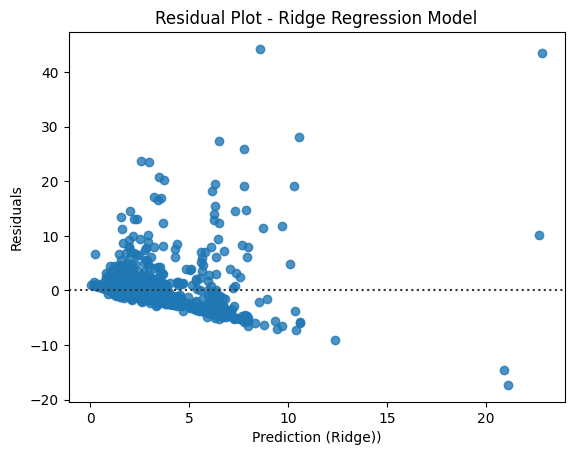

In [35]:
residual = (y_valid - y_pred_ridge_model)
sns.residplot(x=y_pred_ridge_model, y=residual)
plt.xlabel("Prediction (Ridge))")
plt.ylabel("Residuals")
plt.title("Residual Plot - Ridge Regression Model")
plt.show()

## Modelo alternativo - SVR

A fim de lidar com esses valores que distoam mais da previsão feita pelo modelo de regressão `Ridge`, a ideia é partir para o modelo *Support Vector Regression*. O *SVR* é uma adaptação do modelo de classificação *Support Vector Machines* (*SVM*) para problemas de regressão. 

Assim como a *SVM*, o *SVR* tenta encontrar o melhor hiperplano que se ajuste aos dados, mas com uma abordagem ligeiramente diferente. Em vez de tentar ajustar a maior margem entre duas classes como na SVM, o SVR tenta ajustar uma linha aos dados de tal maneira que a maior quantidade de pontos possíveis estejam dentro de um certo limite em torno dessa linha. Em outras palavras, o SVR tenta minimizar a quantidade de erro dentro desse limite, dado por um hiperparâmetro $\epsilon$ (*epsilon*) e considera apenas erros que estão fora do limite.

Além do mais, é importante utilizar uma técnica de estandardizar os dados, de forma que o algoritmo, que tem o objetivo de incluir o máximo de dados dentro do limite de $\epsilon$, conseguirá desempenhar sua função com melhor desempenho.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

REGULARIZATION_PARAMETER = 1
EPSILON = 0.1

scaler = StandardScaler()
svr_model = SVR(kernel='linear', C=REGULARIZATION_PARAMETER, epsilon=EPSILON)

scaler_svr_pipe = Pipeline([
    ("scaler", scaler),
    ("model", svr_model),
])

scaler_svr_pipe.fit(X_train, y_train)
y_pred_svr = scaler_svr_pipe.predict(X_valid)

### Avaliação do modelo alternativo

In [37]:
RMSE = np.sqrt(mean_squared_error(y_valid, y_pred_svr))

print(f"RMSE do modelo de regressão SVR: {RMSE}")

RMSE do modelo de regressão SVR: 3.2638087299535505


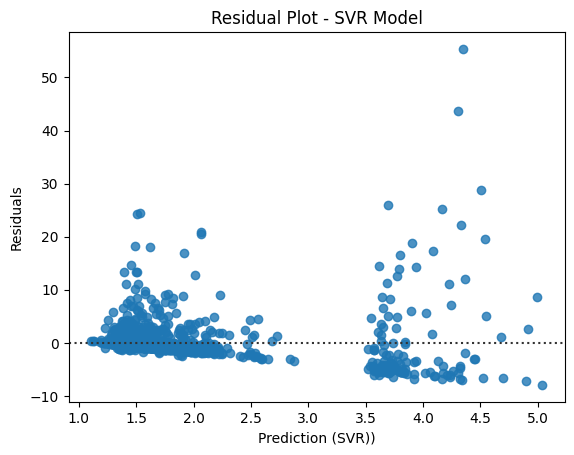

In [38]:
residual = (y_valid - y_pred_svr)
sns.residplot(x=y_pred_svr, y=residual)
plt.xlabel("Prediction (SVR))")
plt.ylabel("Residuals")
plt.title("Residual Plot - SVR Model")
plt.show()

# Seleção e Teste do modelo

Pode ser observado que, ao se alterar para um modelo de *SVR*, o desempenho sofreu uma pequena piora para a previsão dos preços das cartas. Portanto, considerando todas as descobertas realizadas, o modelo final selecionado foi o de *Regressão Linear com Ridge*. 

O modelo ajustado é então testado usando o conjunto de teste, que contém o restante dos dados. Isso permite avaliar como o modelo se comporta em situações reais e verificar sua capacidade de generalização.

In [39]:
y_pred_final = ridge_model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_final))

print(f"RMSE do modelo de regressão Ridge para o conjunto de testes: {RMSE}")

RMSE do modelo de regressão Ridge para o conjunto de testes: 4.354784302540497


In [49]:
print(f"Coeficientes do modelo de regressão Ridge: \n{ridge_model.coef_}")
greater_coef_idx = [x[0] for x in sorted(enumerate(ridge_model.coef_), key=lambda x: x[1])[-10:]]
smaller_coef_idx = [x[0] for x in sorted(enumerate(ridge_model.coef_), key=lambda x: x[1])[:10]]
greater_coef_feature = []
smaller_coef_feature = []
greater_coef_weight = []
smaller_coef_weight = []

print("\nCoeficientes que impactam mais positivamente:\n")
for idx in greater_coef_idx:
    print(f"{model_data.columns[idx]}: {ridge_model.coef_[idx]}")
    greater_coef_feature.append(model_data.columns[idx])
    greater_coef_weight.append(ridge_model.coef_[idx])


print("\nCoeficientes que impactam mais negativamente:\n")
for idx in smaller_coef_idx:
    print(f"{model_data.columns[idx]}: {ridge_model.coef_[idx]}")
    smaller_coef_feature.append(model_data.columns[idx])
    smaller_coef_weight.append(ridge_model.coef_[idx])

Coeficientes do modelo de regressão Ridge: 
[-1.49003251e-04  7.08517027e-06  1.90859737e-01 -6.25992626e-01
  4.31769480e-02 -6.81235448e-01 -7.86940685e-02  2.61425560e-02
 -6.32077194e-02 -9.24754064e-01 -5.08271893e+00 -3.54280052e+00
  4.35084160e-01  4.90182874e+00 -4.00482179e+00 -3.95176237e+00
 -5.12274630e+00 -5.04641254e+00 -3.17881785e+00 -2.75223929e+00
 -1.06830574e+00 -4.23778076e+00 -5.51543580e-01 -4.85184591e+00
 -3.31463374e+00  1.40550582e+01 -4.48202912e+00  0.00000000e+00
  1.74054228e+00 -3.18934734e+00 -1.50834965e-01  1.38199033e+00
 -3.28584111e-01 -2.42500196e-01 -1.59997906e-01  1.34965022e-01
 -5.19278942e-01 -1.69888324e-01  0.00000000e+00  1.58279240e-01
  4.63093071e-01  4.89964102e-02  8.72607293e-02  1.15759232e-01
  1.63397946e-01  1.20586949e-01 -3.17884026e-01  3.93352571e-03
  5.85018712e-01 -8.99236945e-03  2.01100018e-01  1.05022150e+00
  1.38199033e+00  3.64395669e-01  2.30346206e-01 -1.34717529e-01
 -3.57017457e-02  1.26110477e-01  2.26736891e-

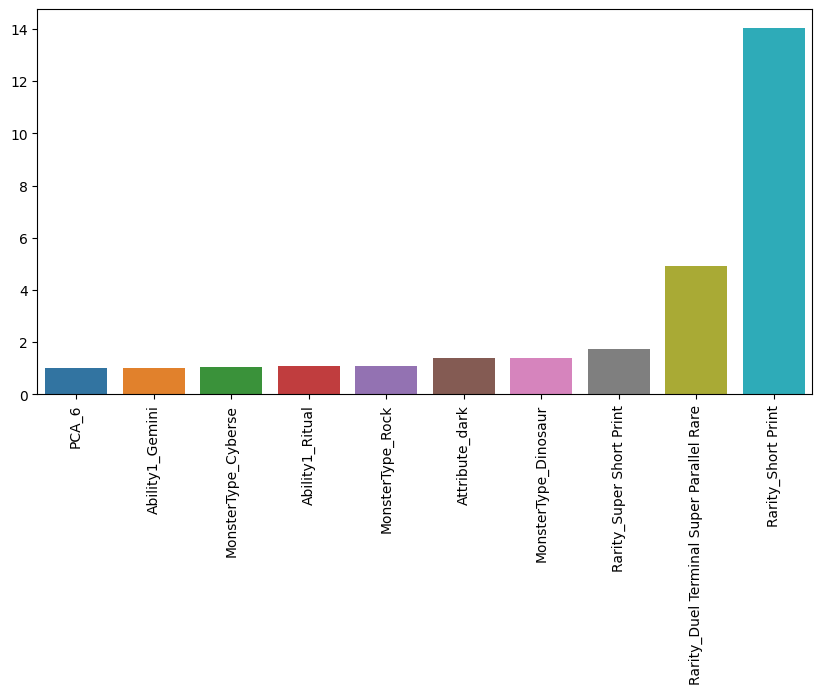

In [64]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(x=greater_coef_feature, y=greater_coef_weight, width=0.8);

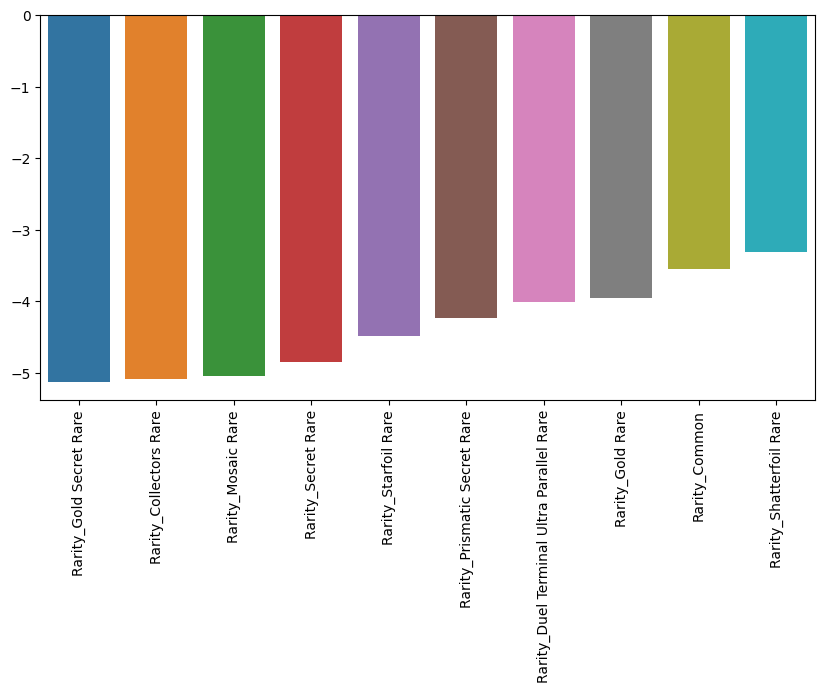

In [65]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(x=smaller_coef_feature, y=smaller_coef_weight, width=0.8);

# Conclusão

Em síntese, o relatório descreve a implementação e os resultados de dois modelos de aprendizado de máquina - um modelo de regressão linear com regularização Ridge e um modelo de regressão Support Vector Regression (SVR) - para prever o preço de cartas de Yu-Gi-Oh com base em suas características múltiplas. Ao comparar ambos os modelos, a regressão Ridge superou o SVR, fornecendo previsões de preço ligeiramente mais precisas para as cartas, na etapa de validação.

Os modelos foram testados utilizando um conjunto de dados separados para teste e o modelo de regressão Ridge apresentou um desempenho relativamente robusto, corroborando a eficácia do modelo na tarefa de previsão de preços. Estes resultados são encorajadores e destacam o potencial do uso de aprendizado de máquina em aplicações do mercado de cartas colecionáveis. No entanto, é importante destacar que, com um erro médio de aproximadamente $4$ dólares, a previsão do preço de cartas do tipo *Skill*, que tendem a ser mais baratas, pode ser significativamente impactada.

Além disso, este estudo abre caminho para futuras pesquisas. Um aspecto promissor a ser explorado é o desempenho dos modelos ao dividir os dados em subconjuntos específicos para cada tipo de carta. Isto pode permitir uma análise mais detalhada e precisa das variações de preços em relação às diferentes categorias de cartas, aumentando ainda mais a eficácia dos modelos de previsão.

Em conclusão, a aplicação de técnicas de aprendizado de máquina para prever o preço de cartas de Yu-Gi-Oh demonstrou ser uma ferramenta valiosa, proporcionando insights significativos e precisos sobre o mercado de cartas colecionáveis. Esses resultados podem servir como base para o desenvolvimento de estratégias de negociação mais eficazes para colecionadores e negociantes.

# Referências

Base de dados do Kaggle disponível [aqui](https://www.kaggle.com/datasets/thedevastator/yu-gi-oh-dataset?select=yugioh_enriched.csv).

Requisições web realizadas ao iterar sobre os sets de cartas, obtendo os preços das cartas pertencentes aos respectivos sets. Esta API pode ser consumida pelo endpoint `https://yugiohprices.com/api/set_data/{nome_do_set}`. Exemplo de resposta pode ser observado [aqui](https://yugiohprices.com/api/set_data/2013%20Collectible%20Tins%20Wave%201).